In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nexuswho/tomatofruits")

print("Path to dataset files:", path)

100%|██████████| 156M/156M [00:04<00:00, 36.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nexuswho/tomatofruits/versions/1


In [2]:
!mv /root/.cache/kagglehub/datasets/nexuswho/tomatofruits/versions/1 /content

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image
import numpy as np
# import Image
import os

In [4]:
pip install split-folders

In [5]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/1/Two Classes", output="/content/data",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 2400 files [00:00, 6414.64 files/s]


In [10]:
num_classes = 2
img_rows, img_cols = 224, 224
batch_size = 16

train_data_dir = '/content/data/train'
validation_data_dir = '/content/data/val'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1920 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 222, 222, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 111, 111, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 109, 109, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │      95,552,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │           1,026 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,618,594 (364.76 MB)

 Trainable params: 95,618,594 (364.76 MB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("fruits_fresh_cnn_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# # we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# # We use a very small learning rate
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

nb_train_samples = 1920
nb_validation_samples = 240
epochs = 10

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.6192 - loss: 0.9685
Epoch 1: val_loss improved from inf to 0.51491, saving model to fruits_fresh_cnn_1.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 382ms/step - accuracy: 0.6195 - loss: 0.9664 - val_accuracy: 0.6708 - val_loss: 0.5149 - learning_rate: 0.0010
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6474 - loss: 0.6298
Epoch 2: val_loss did not improve from 0.51491
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.6475 - loss: 0.6294 - val_accuracy: 0.6667 - val_loss: 0.5260 - learning_rate: 0.0010
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.6422 - loss: 0.5675
Epoch 3: val_loss improved from 0.51491 to 0.50618, saving model to fruits_fresh_cnn_1.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 354ms/step - accuracy: 0.6423 - loss: 0.5674 - val_accuracy: 0.6667 - val_loss: 0.5062 - learning_rate: 0.0010
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6718 - loss: 0.5552
Epoch 4: val_loss did not improve from 0.50618
120/120 ━━━━━━━━━━━━━━━━━━━━ 69s 248ms/step - accuracy: 0.6717 - loss: 0.5552 - val_accuracy: 0.6667 - val_loss: 0.5787 - learning_rate: 0.0010
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6687 - loss: 0.5667
Epoch 5: val_loss did not improve from 0.50618
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 264ms/step - accuracy: 0.6688 - loss: 0.5666 - val_accuracy: 0.6667 - val_loss: 0.5705 - learning_rate: 0.0010
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.6771 - loss: 0.5417
Epoch 6: val_loss improved from 0.50618 to 0.50589, saving model to fruits_fresh_cnn_1.h5


120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 349ms/step - accuracy: 0.6771 - loss: 0.5417 - val_accuracy: 0.6708 - val_loss: 0.5059 - learning_rate: 0.0010
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.6636 - loss: 0.5612
Epoch 7: val_loss did not improve from 0.50589
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.6637 - loss: 0.5611 - val_accuracy: 0.6708 - val_loss: 0.5350 - learning_rate: 0.0010
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7094 - loss: 0.5390
Epoch 8: val_loss did not improve from 0.50589
120/120 ━━━━━━━━━━━━━━━━━━━━ 30s 249ms/step - accuracy: 0.7093 - loss: 0.5391 - val_accuracy: 0.6667 - val_loss: 0.6340 - learning_rate: 0.0010
Epoch 9/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.7017 - loss: 0.5345
Epoch 9: val_loss did not improve from 0.50589

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.7017 - loss: 0.5345 - val_a

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Confusion Matrix
[[90 70]
 [ 9 71]]
Classification Report


In [21]:
target_names = next(os.walk('/content/data/train'))[1]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.91      0.56      0.69       160
      Reject       0.50      0.89      0.64        80

    accuracy                           0.67       240
   macro avg       0.71      0.72      0.67       240
weighted avg       0.77      0.67      0.68       240



15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


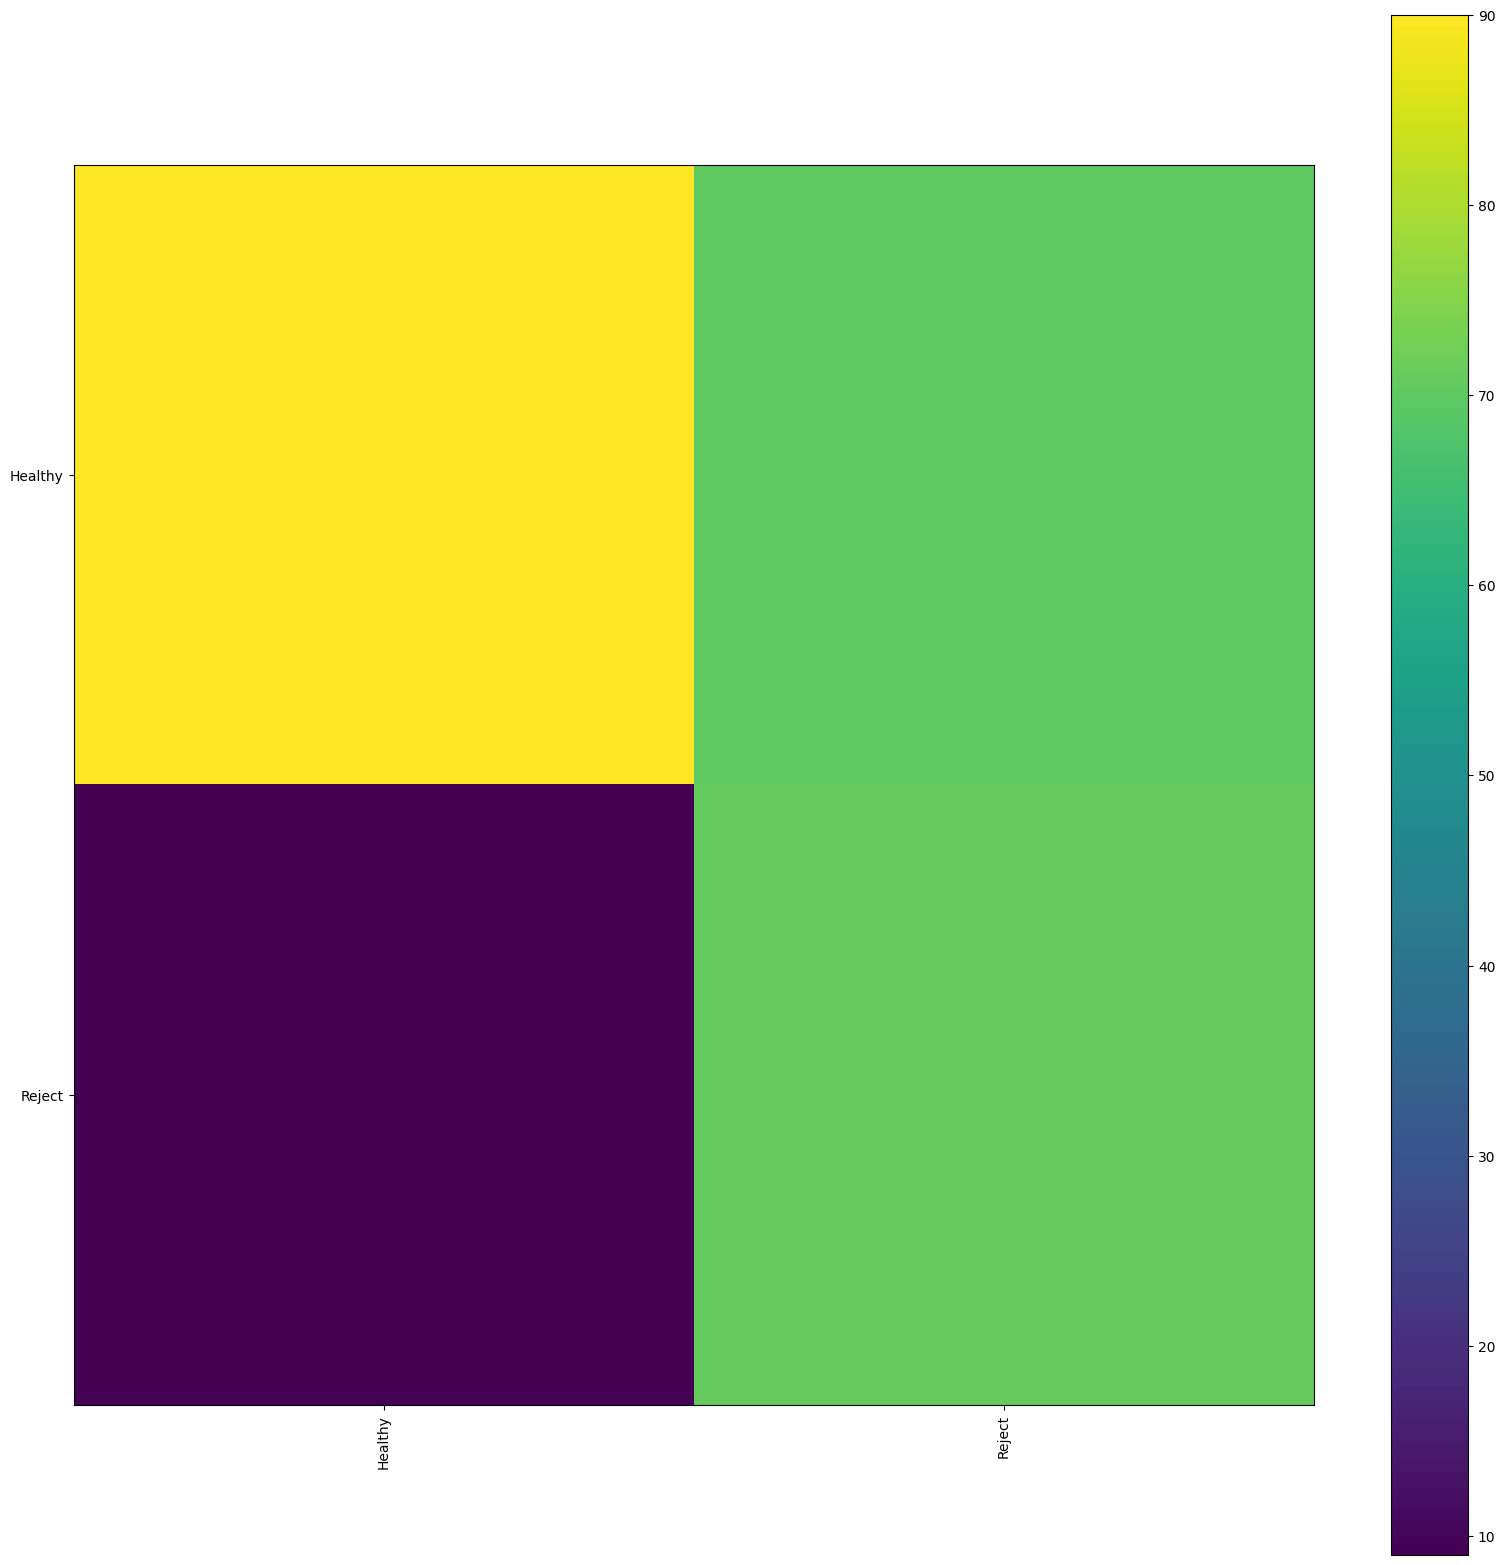

In [22]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('/content/fruits_fresh_cnn_1.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 1920
nb_validation_samples = 240

#Confution Matrix and Classification Report
Y_pred = model.predict(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

**Comparison of Models**

In [25]:
import pandas as pd

df = pd.read_csv('/content/final test.csv')

print(df.to_string())

     Model      size mAPval     Speed        Speed.1 params  FLOPs
0      NaN  (pixels)  50-95  CPU ONNX  A100 TensorRT    (M)    (B)
1      NaN       NaN    NaN      (ms)           (ms)    NaN    NaN
2  YOLOv8n       640   37.3      80.4           0.99    3.2    8.7
3  YOLOv8s       640   44.9     128.4            1.2   11.2   28.6
4  YOLOv8m       640   50.2     234.7           1.83   25.9   78.9
5  YOLOv8l       640   52.9     375.2           2.39   43.7  165.2
6  YOLOv8x       640   53.9     479.1           3.53   68.2  257.8


In [26]:
from google.colab import files
files.download("/content/data")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>